**Jupyter: w_ipa**

This is an example jupyter/ipython notebook for WESTPA simulations, designed for interactive analysis using w_ipa.  Use this as a template for further browser-based interactive analysis of simulations.

You'll want to start each notebook session with the following:

```
    import w_ipython
    w = w_ipython.WIPI()
    w.main()
```

The w object can then be used for analysis.  Schemes can be listed and changed with

```
    w.list_schemes
    w.scheme = SCHEME_NUMBER/NAME
```

Run help(w), or w.introduction for more details.

Happy analyzing!

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import w_ipa
w = w_ipa.WIPI()
# At startup, it will load or run the analysis schemes specified in the configuration file (typically west.cfg)
w.main()
w.interface = 'matplotlib'


Welcome to w_ipa (WESTPA Interactive Python Analysis) v. 1.0B!
Run w.introduction for a more thorough introduction, or w.help to see a list of options.
Running analysis & loading files.

Complete!
Setting iteration to iter 100.


In [2]:
# Set the iteration to the second to last one.
w.iteration -= 1

# Access the current iteration dictionary, and return an interesting segment:
# the heaviest one in the current segment!
# Note that we can access either as attributes or dictionary keys!
# Attributes can be tab completed when running in console mode.
heaviest_segment = w.current.maxweight.seg_id
print('{} is the walker with the maximum weight!\n'.format(heaviest_segment))
# We can index the current iteration according to the seg_id...
print('Indexing according to a seg_id returns all properties on the segment.')
print('Children and parents have the same properties/keys.')
print(str(w.current[heaviest_segment]) + '\n')
# ... we can also see what its parents were like, or what any children are like, should they exist!
print('Where did it come from?  Does it have any descendents?')
print('{} is the parent!'.format(w.past[heaviest_segment].seg_id))
print('{} is/are the children!\n'.format(w.future[heaviest_segment].seg_id))

# We can see that the past/future objects are keyed to seg_ids in the CURRENT iteration, always.
# We can also see all available properties on the current iteration, and index THOSE according to a segment.
# As an example:
print('Can we index either way?')
print(str((w.current.pcoord[heaviest_segment] == w.current[heaviest_segment].pcoord)[0]) + '\n')

# w.current also contains the output from w_direct/w_reweight/w_assign for the current iteration.
# w.past contains the same output, from the prior iteration, keyed to the current seg_id
print('What properties exist in the current dictionary?')
print(w.current)

Setting iteration to iter 99.
659 is the walker with the maximum weight!

Indexing according to a seg_id returns all properties on the segment.
Children and parents have the same properties/keys.
['auxdata', 'bins', 'parents', 'pcoord', 'plotter', 'seg_id', 'states', 'weights']

Where did it come from?  Does it have any descendents?
635 is the parent!
[640 642 643] is/are the children!

Can we index either way?
[ True]

What properties exist in the current dictionary?
['aggregate_walkers', 'auxdata', 'bins', 'color_prob_evolution', 'conditional_flux_evolution', 'direct', 'instant_matrix', 'iteration', 'matrix', 'maxweight', 'minweight', 'parent', 'parents', 'pcoord', 'rate_evolution', 'raw', 'reweight', 'seg_id', 'state_pop_evolution', 'states', 'successful_trajectories', 'summary', 'target_flux_evolution', 'total_fluxes', 'walkers', 'weights']


What data can we access from our trace for segment 659?
['auxdata', 'bins', 'iteration', 'pcoord', 'seg_id', 'state_labels', 'states', 'weights']
None


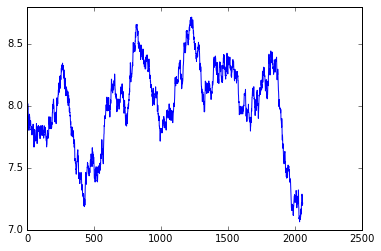

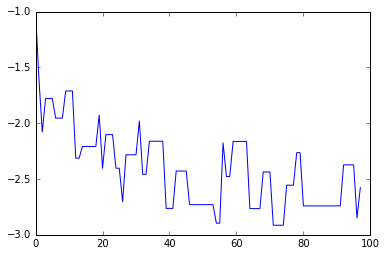

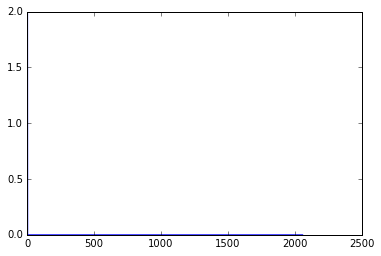

In [3]:
# Let's trace our heaviest walker to see its history!
hs_trace = w.trace(heaviest_segment)
print('What data can we access from our trace for segment {}?'.format(heaviest_segment))
print(hs_trace.keys())
# Then plot something interesting about it, like the pcoord or the weight changes over time.
# The resulting plot is per time point, not iteration.
plt.plot(hs_trace['pcoord'])
plt.show()
plt.plot(np.log10(hs_trace['weights']))
plt.show()
# We can plot the state changes over time, too, if we wanted.
plt.plot(hs_trace['states'])

State labels and definitions!
0: unbound
1: bound
2: Unknown
None


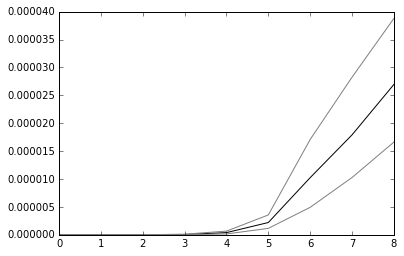

Rate evolution from state 0 to 1


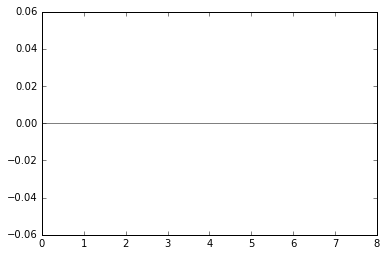

Rate evolution from state 1 to 0


In [4]:
# There's a built in plotting interface that can be used to plot interesting things!
# Try running this command directly from the terminal in w_ipa.
print(w.state_labels)
w.current.direct.rate_evolution.plot(interface='matplotlib')
print("Rate evolution from state 0 to 1")
w.current.direct.rate_evolution.plot(1,0,interface='matplotlib')
print("Rate evolution from state 1 to 0")